# Attribute Information

## Input features in order :

#### 1) CRIM - per capita crime rate by town
#### 2) ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#### 3) INDUS - proportion of non-retail business acres per town
#### 4) CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#### 5) NOX - nitric oxides concentration (parts per 10 million) [parts/10M]
#### 6) RM - average number of rooms per dwelling
#### 7) AGE - proportion of owner-occupied units built prior to 1940
#### 8) DIS - weighted distances to five Boston employment centres
#### 9) RAD - index of accessibility to radial highways
#### 10) TAX - full-value property-tax rate per $10,000 [$/10k]
#### 11) PTRATIO - pupil-teacher ratio by town
#### 12) B - The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### 13) LSTAT - % lower status of the population

## Output variable:
#### 1) MEDV - Median value of owner-occupied homes in $1000's [k$]

In [67]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from tensorflow import keras

from tensorflow.keras.layers import LeakyReLU

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
file_data = 'D:\\Sourav_Singh\\Excell ,SQL & Tableau\\Project_to_make\\boston_house_price.csv'
Data = pd.read_csv(file_data)

In [3]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Check for Duplicate or Similar Columns

In [5]:
duplicates = Data.T.duplicated()
print("Duplicate Columns:", Data.columns[duplicates].tolist())

Duplicate Columns: []


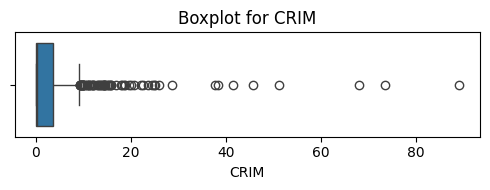

Column : CRIM
Q1 : 0.08204499999999999, Q3 : 3.6770825, IQR : 3.5950375
Number of outliers in CRIM : 66




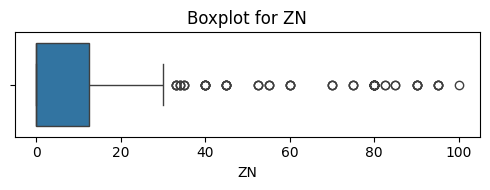

Column : ZN
Q1 : 0.0, Q3 : 12.5, IQR : 12.5
Number of outliers in ZN : 68




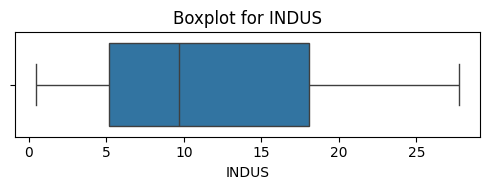

Column : INDUS
Q1 : 5.19, Q3 : 18.1, IQR : 12.91
Number of outliers in INDUS : 0




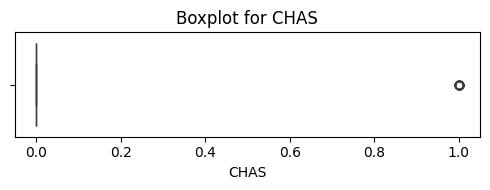

Column : CHAS
Q1 : 0.0, Q3 : 0.0, IQR : 0.0
Number of outliers in CHAS : 35




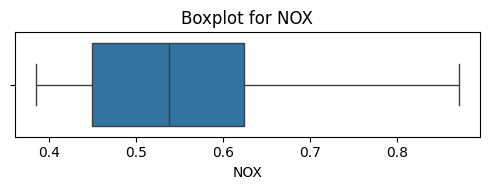

Column : NOX
Q1 : 0.449, Q3 : 0.624, IQR : 0.175
Number of outliers in NOX : 0




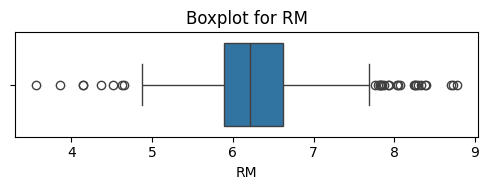

Column : RM
Q1 : 5.8854999999999995, Q3 : 6.6235, IQR : 0.7380000000000004
Number of outliers in RM : 30




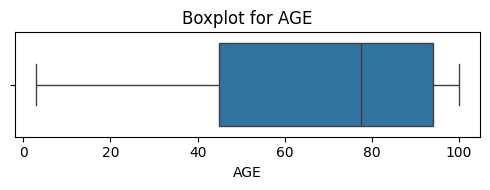

Column : AGE
Q1 : 45.025, Q3 : 94.07499999999999, IQR : 49.04999999999999
Number of outliers in AGE : 0




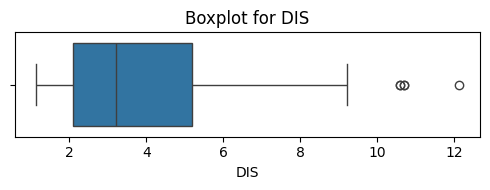

Column : DIS
Q1 : 2.100175, Q3 : 5.1884250000000005, IQR : 3.0882500000000004
Number of outliers in DIS : 5




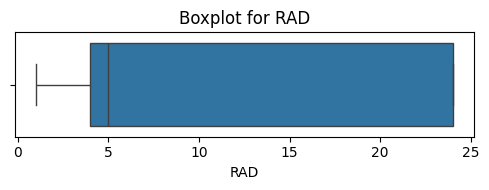

Column : RAD
Q1 : 4.0, Q3 : 24.0, IQR : 20.0
Number of outliers in RAD : 0




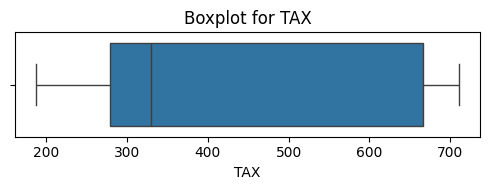

Column : TAX
Q1 : 279.0, Q3 : 666.0, IQR : 387.0
Number of outliers in TAX : 0




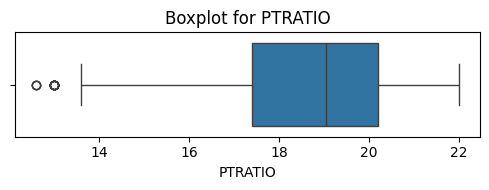

Column : PTRATIO
Q1 : 17.4, Q3 : 20.2, IQR : 2.8000000000000007
Number of outliers in PTRATIO : 15




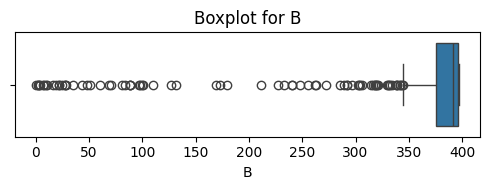

Column : B
Q1 : 375.3775, Q3 : 396.225, IQR : 20.847500000000025
Number of outliers in B : 77




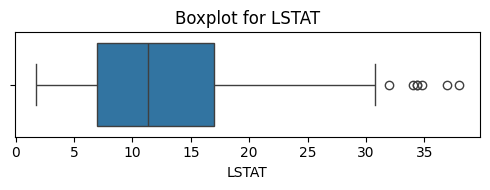

Column : LSTAT
Q1 : 6.949999999999999, Q3 : 16.955000000000002, IQR : 10.005000000000003
Number of outliers in LSTAT : 7




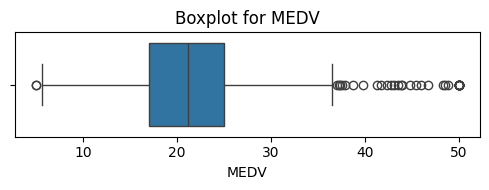

Column : MEDV
Q1 : 17.025, Q3 : 25.0, IQR : 7.975000000000001
Number of outliers in MEDV : 40


In [6]:
# List of numerical columns to calculate IQR 
numerical_columns = Data.select_dtypes(include=['int', 'float']).columns

# To calculate IQR and identify outliers 
def detect_outliers_iqr(data, clmn):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[clmn].quantile(0.25)
    Q3 = data[clmn].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[clmn] < lower_bound) | (data[clmn] > upper_bound)]
    
    return Q1, Q3, IQR, outliers

# calculate IQR, detect outliers
for col in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(Data, col)

    print( "\n" )
    # Boxplot to visualize the outliers
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=Data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()    
    
    print(f"Column : {col}")
    print(f"Q1 : {Q1}, Q3 : {Q3}, IQR : {IQR}")
    print(f"Number of outliers in {col} : {len(outliers)}")

In [7]:
# calculate IQR and filter out rows with outliers
def remove_outliers_iqr(data, clmn):
    # Q1 and Q3 
    Q1 = data[clmn].quantile(0.25)
    Q3 = data[clmn].quantile(0.75)
    
    # Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Setting up bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keeping only the rows within the bounds (without outliers)
    Data_no_outliers = data[(data[clmn] >= lower_bound) & (data[clmn] <= upper_bound)]
    
    return Data_no_outliers

# copy of the dataset so we can modify it safely
Data_no_outliers = Data.copy()

# Remove outliers
for col in numerical_columns:
    Data_no_outliers = remove_outliers_iqr(Data_no_outliers, col)

In [8]:
# Print the number of rows removed
print(f"Removed {len(Data) - len(Data_no_outliers)} outliers.")

# Display initial dataset shape
print("Dataset shape before removing outliers :", Data.shape)

# Display cleaned dataset shape
print("Dataset shape after removing outliers :", Data_no_outliers.shape)

# Calculate the percentage of removed outliers
removed_percentage = ((Data.shape[0] - Data_no_outliers.shape[0]) / Data.shape[0]) * 100

print(f"Percentage of outliers removed : {removed_percentage:.2f} %")

Removed 292 outliers.
Dataset shape before removing outliers : (506, 14)
Dataset shape after removing outliers : (214, 14)
Percentage of outliers removed : 57.71 %


In [9]:
# Initialize lists to store column names with and without outliers
columns_with_outliers = []
columns_without_outliers = []

# Calculate IQR, detect outliers, and identify columns with/without outliers
for col in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(Data, col)
    
    if len(outliers) > 0:
        columns_with_outliers.append(col)
    else:
        columns_without_outliers.append(col)

# Print column names with outliers
print("\nColumns with outliers :")
print(columns_with_outliers)

# Print column names without outliers
print("\nColumns without outliers :")
print(columns_without_outliers)


Columns with outliers :
['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Columns without outliers :
['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']


In [10]:
# select columns to apply log transformation
Data[columns_with_outliers] = np.log1p(Data[columns_with_outliers])

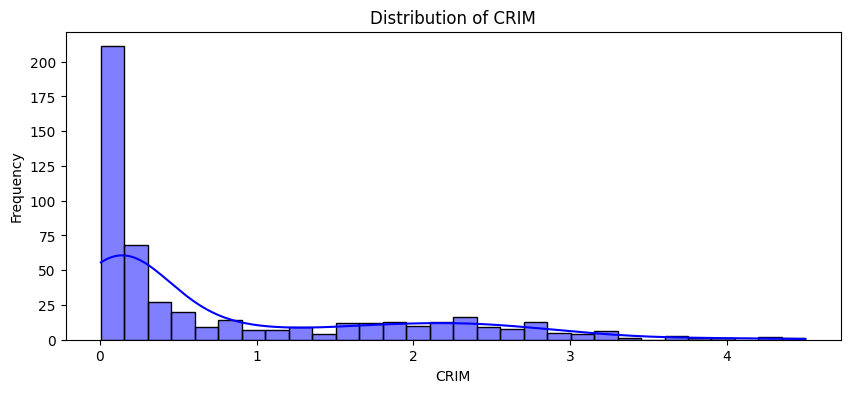

Analysis for 'CRIM':
Unique Values Count : 504
Unique Values Count : CRIM
0.014898    2
2.730053    2
0.034073    1
0.030655    1
0.030034    1
           ..
0.923870    1
1.041608    1
0.901526    1
0.821303    1
0.046320    1
Name: count, Length: 504, dtype: int64

Mean Value : 0.81
Median Value : 0.23
Mode (Most Frequent Value) : 0.01
Variance : 1.05
Standard Deviation : 1.02
------------------------------------------------------------------------------------------




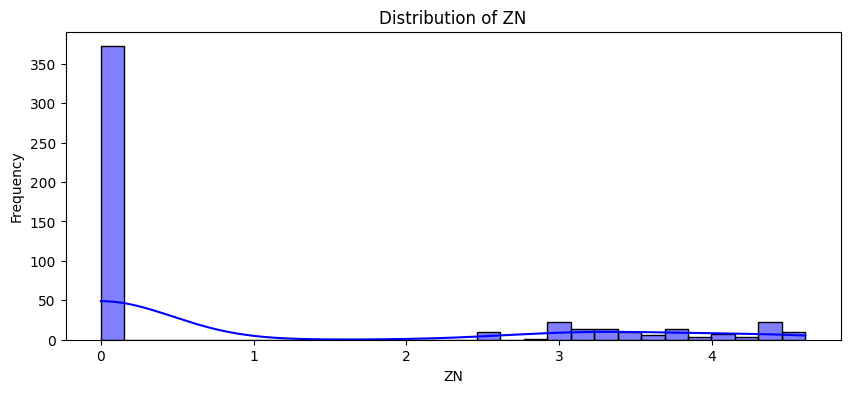

Analysis for 'ZN':
Unique Values Count : 26
Unique Values Count : ZN
0.000000    372
3.044522     21
4.394449     15
3.135494     10
2.602690     10
3.258097     10
3.713572      7
3.828641      6
3.433987      6
4.510860      5
4.564348      4
4.110874      4
3.091042      4
3.526361      4
4.025352      3
4.262680      3
3.555348      3
3.979682      3
3.583519      3
3.367296      3
4.330733      3
4.424847      2
4.454347      2
2.917771      1
4.615121      1
2.944439      1
Name: count, dtype: int64

Mean Value : 0.95
Median Value : 0.00
Mode (Most Frequent Value) : 0.00
Variance : 2.63
Standard Deviation : 1.62
------------------------------------------------------------------------------------------




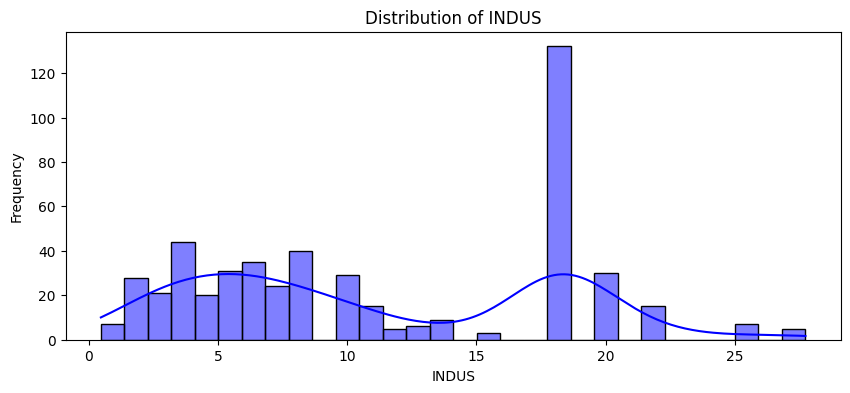

Analysis for 'INDUS':
Unique Values Count : 76
Unique Values Count : INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: count, Length: 76, dtype: int64

Mean Value : 11.14
Median Value : 9.69
Mode (Most Frequent Value) : 18.10
Variance : 47.06
Standard Deviation : 6.86
------------------------------------------------------------------------------------------




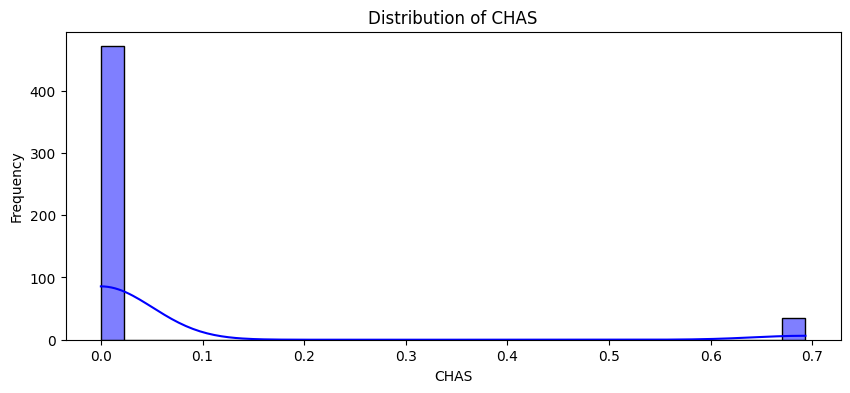

Analysis for 'CHAS':
Unique Values Count : 2
Unique Values Count : CHAS
0.000000    471
0.693147     35
Name: count, dtype: int64

Mean Value : 0.05
Median Value : 0.00
Mode (Most Frequent Value) : 0.00
Variance : 0.03
Standard Deviation : 0.18
------------------------------------------------------------------------------------------




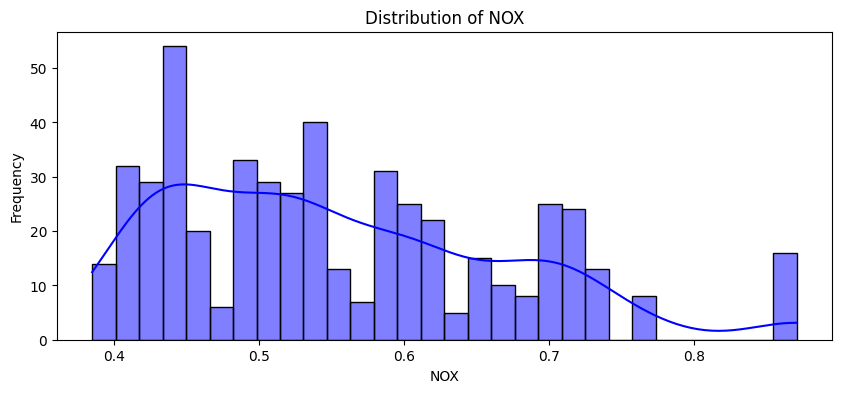

Analysis for 'NOX':
Unique Values Count : 81
Unique Values Count : NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.394     1
0.518     1
0.385     1
0.389     1
0.435     1
Name: count, Length: 81, dtype: int64

Mean Value : 0.55
Median Value : 0.54
Mode (Most Frequent Value) : 0.54
Variance : 0.01
Standard Deviation : 0.12
------------------------------------------------------------------------------------------




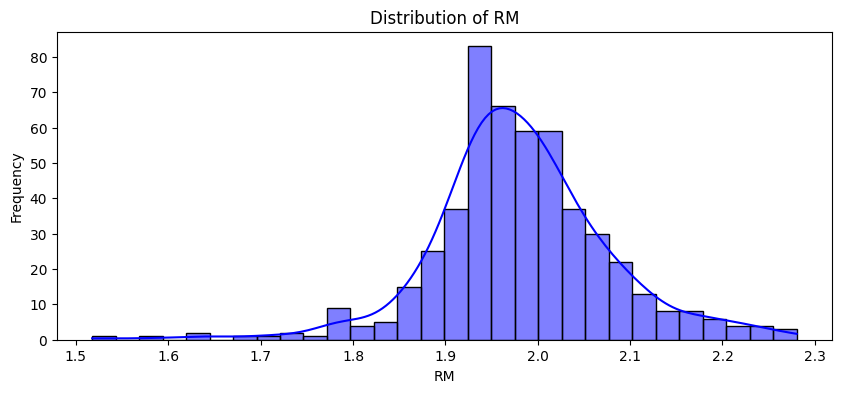

Analysis for 'RM':
Unique Values Count : 446
Unique Values Count : RM
1.904046    3
1.969487    3
1.963890    3
1.978101    3
2.002155    3
           ..
1.925562    1
2.003640    1
1.882818    1
1.928619    1
2.076437    1
Name: count, Length: 446, dtype: int64

Mean Value : 1.98
Median Value : 1.98
Mode (Most Frequent Value) : 1.90
Variance : 0.01
Standard Deviation : 0.10
------------------------------------------------------------------------------------------




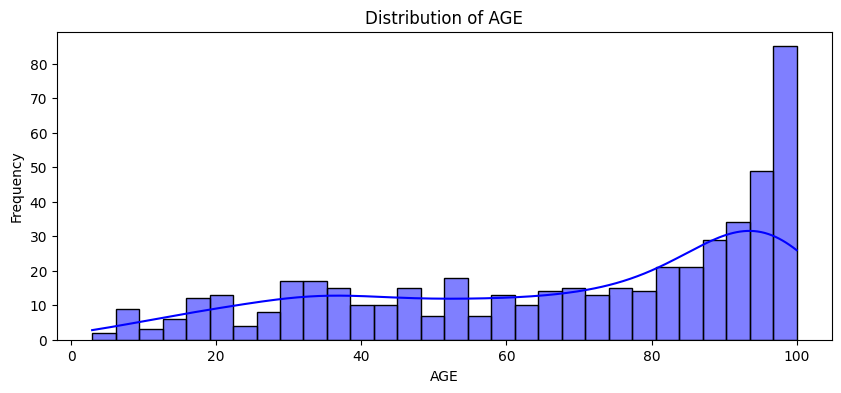

Analysis for 'AGE':
Unique Values Count : 356
Unique Values Count : AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

Mean Value : 68.57
Median Value : 77.50
Mode (Most Frequent Value) : 100.00
Variance : 792.36
Standard Deviation : 28.15
------------------------------------------------------------------------------------------




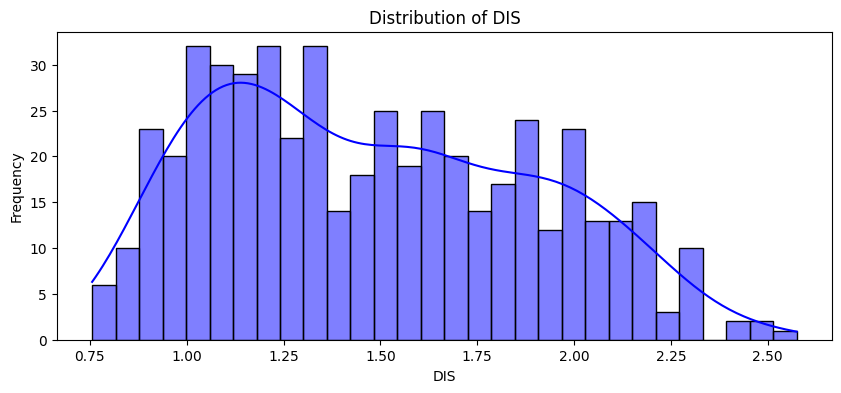

Analysis for 'DIS':
Unique Values Count : 412
Unique Values Count : DIS
1.503010    5
1.905222    4
1.838532    4
2.056007    4
1.856407    4
           ..
1.230225    1
1.151205    1
1.112088    1
1.088865    1
1.254191    1
Name: count, Length: 412, dtype: int64

Mean Value : 1.48
Median Value : 1.44
Mode (Most Frequent Value) : 1.50
Variance : 0.17
Standard Deviation : 0.41
------------------------------------------------------------------------------------------




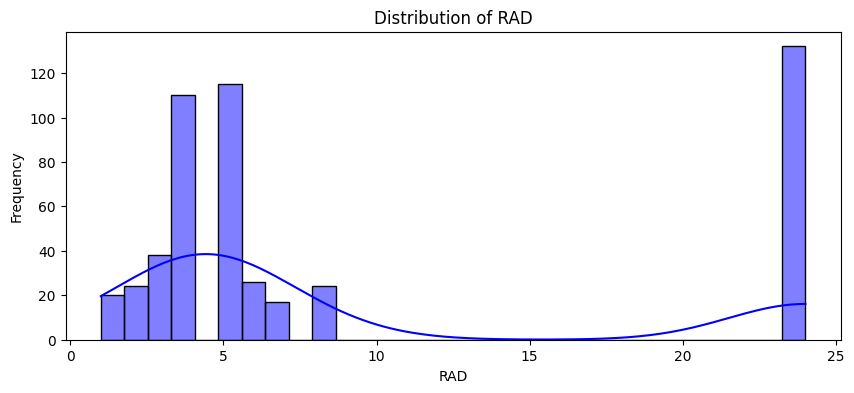

Analysis for 'RAD':
Unique Values Count : 9
Unique Values Count : RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

Mean Value : 9.55
Median Value : 5.00
Mode (Most Frequent Value) : 24.00
Variance : 75.82
Standard Deviation : 8.71
------------------------------------------------------------------------------------------




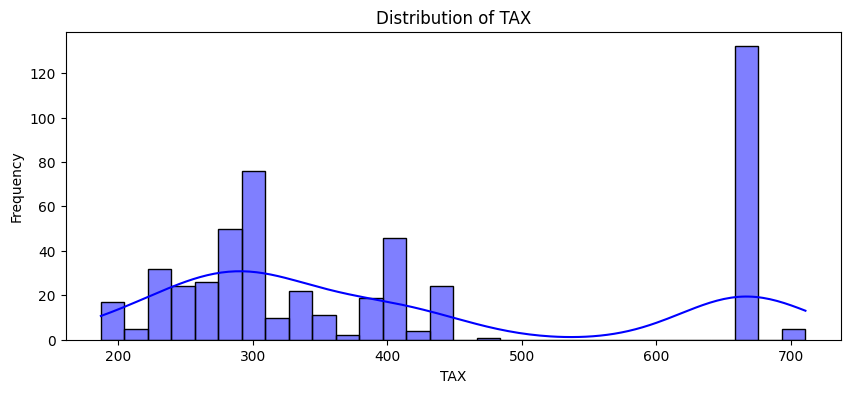

Analysis for 'TAX':
Unique Values Count : 66
Unique Values Count : TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: count, Length: 66, dtype: int64

Mean Value : 408.24
Median Value : 330.00
Mode (Most Frequent Value) : 666.00
Variance : 28404.76
Standard Deviation : 168.54
------------------------------------------------------------------------------------------




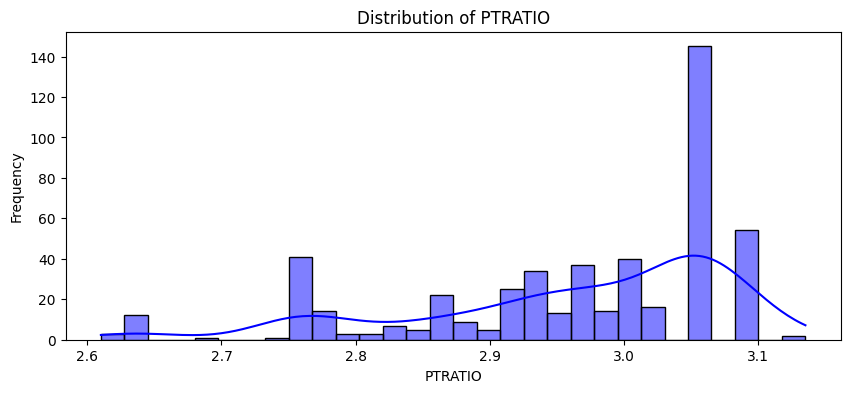

Analysis for 'PTRATIO':
Unique Values Count : 46
Unique Values Count : PTRATIO
3.054001    140
2.753661     34
3.091042     27
2.933857     23
3.005683     19
2.912351     18
2.975530     17
3.000720     17
2.965273     16
2.867899     16
3.100092     15
2.785011     13
2.639057     12
2.939162     11
3.086487     11
2.980619      9
3.025291      8
3.030134      8
2.923162      7
2.856470      6
2.884801      5
2.833213      5
3.049273      5
2.944439      5
2.839078      5
2.995732      4
2.960105      4
2.879198      4
2.954910      4
2.766319      4
2.970414      4
2.890372      4
2.990720      3
2.610070      3
2.760010      3
2.791165      3
2.827314      2
2.809403      2
2.985682      2
3.135494      2
2.681022      1
2.778819      1
2.906901      1
3.095578      1
2.734368      1
2.803360      1
Name: count, dtype: int64

Mean Value : 2.96
Median Value : 3.00
Mode (Most Frequent Value) : 3.05
Variance : 0.01
Standard Deviation : 0.12
--------------------------------------------

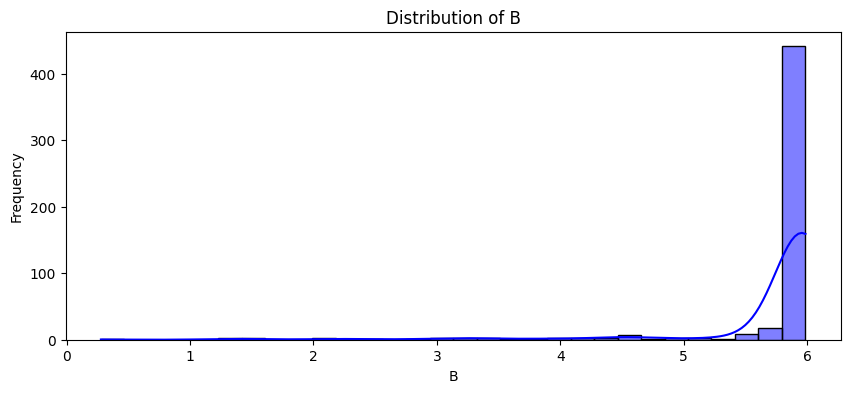

Analysis for 'B':
Unique Values Count : 357
Unique Values Count : B
5.986201    121
5.978227      3
5.982020      3
5.932616      2
5.980707      2
           ... 
5.485461      1
5.967710      1
5.928072      1
5.828710      1
5.973784      1
Name: count, Length: 357, dtype: int64

Mean Value : 5.76
Median Value : 5.97
Mode (Most Frequent Value) : 5.99
Variance : 0.53
Standard Deviation : 0.73
------------------------------------------------------------------------------------------




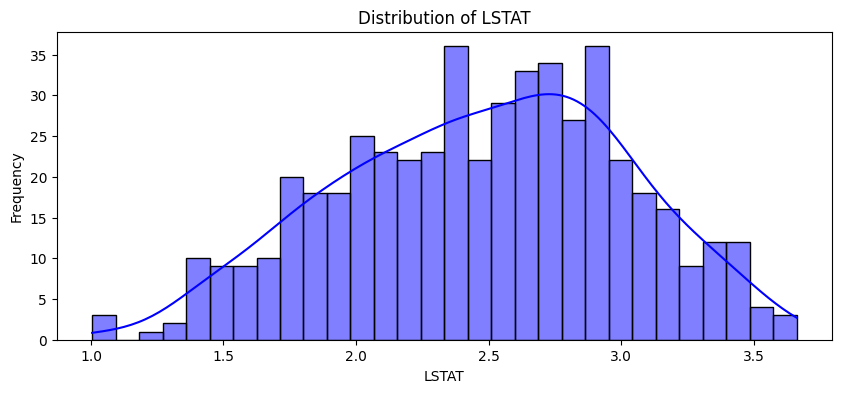

Analysis for 'LSTAT':
Unique Values Count : 455
Unique Values Count : LSTAT
2.173615    3
2.714695    3
1.996060    3
2.951258    3
2.202765    3
           ..
1.463255    1
1.071584    1
1.004302    1
2.005526    1
2.183802    1
Name: count, Length: 455, dtype: int64

Mean Value : 2.48
Median Value : 2.51
Mode (Most Frequent Value) : 2.00
Variance : 0.29
Standard Deviation : 0.54
------------------------------------------------------------------------------------------




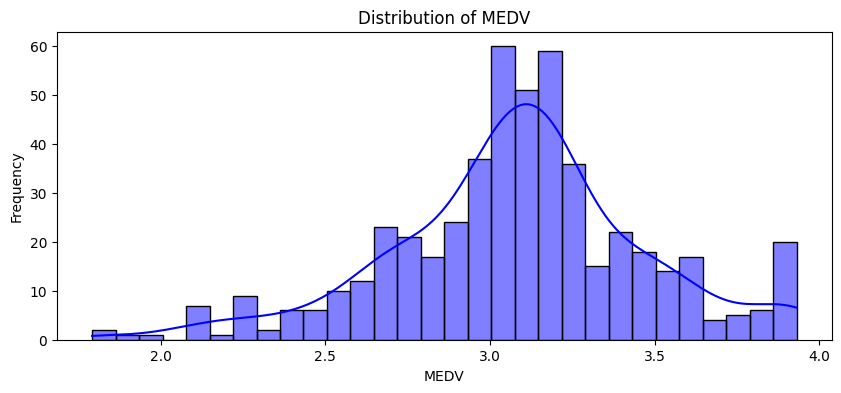

Analysis for 'MEDV':
Unique Values Count : 229
Unique Values Count : MEDV
3.931826    16
3.258097     8
3.135494     7
3.122365     7
3.182212     7
            ..
3.523415     1
3.572346     1
3.443618     1
3.535145     1
2.208274     1
Name: count, Length: 229, dtype: int64

Mean Value : 3.09
Median Value : 3.10
Mode (Most Frequent Value) : 3.93
Variance : 0.15
Standard Deviation : 0.39
------------------------------------------------------------------------------------------




In [11]:
numerical_features = Data.select_dtypes(include=['float', 'int'])
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(Data[feature], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


    # Print mode and other statistics for the feature
    print(f"Analysis for '{feature}':")
    print(f"Unique Values Count : {numerical_features[feature].nunique()}")
    print(f"Unique Values Count : {numerical_features[feature].value_counts()}\n")
    print(f"Mean Value : {numerical_features[feature].mean():.2f}")
    print(f"Median Value : {numerical_features[feature].median():.2f}")
    print(f"Mode (Most Frequent Value) : {numerical_features[feature].mode()[0]:.2f}")
    print(f"Variance : {numerical_features[feature].var():.2f}")
    print(f"Standard Deviation : {numerical_features[feature].std():.2f}")    
    print("-" * 90)
    print("\n")

In [12]:
# Unique Values and Distribution
# '- Unique Values Count: 229
# - 'MEDV' column has 229 unique values, indicating a relatively large range of values.
# - The value counts show that the most frequent value is 50.0, which appears 16 times.

# Central Tendency
# - Mean Value: 22.53
# - The mean value of the 'MEDV' column is 22.53, which suggests that the average median house price is around $22,500.
# - Median Value: 21.20
# - The median value of the 'MEDV' column is 21.20, which is slightly lower than the mean value.
# - Mode (Most Frequent Value): 50.0
# - The most frequent value in the 'MEDV' column is 50.0, which appears to be an outlier given the mean and median values.

# Variability
# - Variance: 84.59
# - The variance of the 'MEDV' column is 84.59, indicating a relatively large spread of values.
# - Standard Deviation: 9.20
# - The standard deviation of the 'MEDV' column is 9.20, which suggests that the values are spread out over a range of around $9,000.

# Overall, the 'MEDV' column appears to have a skewed distribution with a large range of values. The mode is an outlier, and the mean 
# and median values suggest that the average median house price is around $21,000-$22,500.

In [13]:
Data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

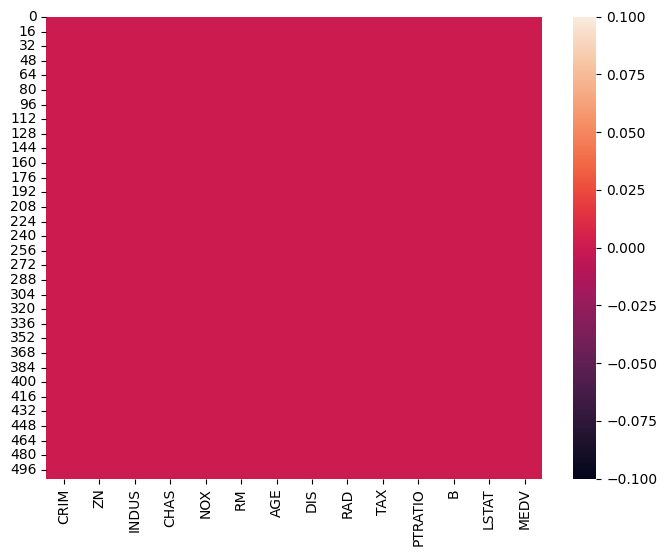

In [14]:
# show the null values using the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Data.isnull())
plt.show()

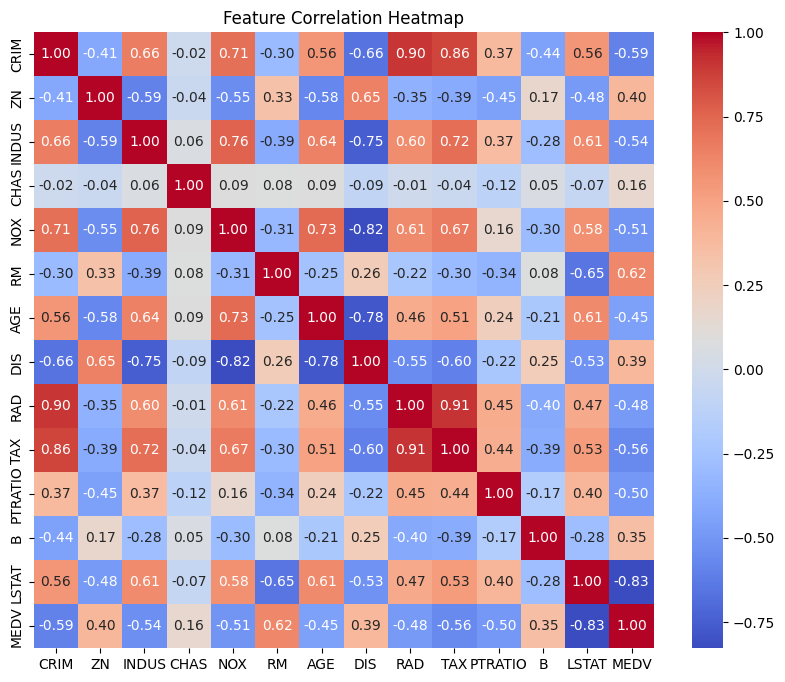

In [15]:
# Compute correlation matrix
corr_matrix = Data.corr()

# Visualize heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Find features with high correlation (> 0.9)
high_corr_features = corr_matrix["MEDV"].abs().sort_values(ascending=False)
print("Highly Correlated Features :\n", high_corr_features)

Highly Correlated Features :
 MEDV       1.000000
LSTAT      0.827465
RM         0.619280
CRIM       0.594500
TAX        0.558832
INDUS      0.541258
NOX        0.508900
PTRATIO    0.495651
RAD        0.478488
AGE        0.452150
ZN         0.400188
DIS        0.390719
B          0.351096
CHAS       0.159435
Name: MEDV, dtype: float64


# Multicollinearity Check Before Train-Test Split

## Multicollinearity Check Methods :-
### 1. Variance Inflation Factor (VIF)

In [17]:
# Define features (drop target column)
X = Data.drop(columns=['MEDV'])
y = Data['MEDV']

In [18]:
# Standardize Features (Optional but Recommended for VIF Calculation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[-0.78995997,  1.22932964, -1.2879095 , ..., -1.44553546,
         0.31108607, -1.2761181 ],
       [-0.7697552 , -0.58909073, -0.59338101, ..., -0.23432428,
         0.31108607, -0.29549095],
       [-0.76977425, -0.58909073, -0.59338101, ..., -0.23432428,
         0.29697693, -1.59738213],
       ...,
       [-0.73839446, -0.58909073,  0.11573841, ...,  1.09991488,
         0.31108607, -1.081705  ],
       [-0.69434626, -0.58909073,  0.11573841, ...,  1.09991488,
         0.29913562, -0.86049628],
       [-0.7507904 , -0.58909073,  0.11573841, ...,  1.09991488,
         0.31108607, -0.54189116]])

In [20]:
print(X_scaled.shape)

(506, 13)


In [21]:
# Convert to DataFrame after Scaling
# X_df = pd.DataFrame(X_scaled, columns=X.columns)
#          or
X_data_frame = pd.DataFrame(X_scaled)

In [22]:
X_data_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.789960,1.229330,-1.287909,-0.272599,-0.144217,0.453447,-0.120013,0.357474,-0.982843,-0.666608,-1.445535,0.311086,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,-0.740262,0.240390,0.367166,0.742438,-0.867883,-0.987329,-0.234324,0.311086,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,-0.740262,1.256834,-0.265812,0.742438,-0.867883,-0.987329,-0.234324,0.296977,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.835284,1.017096,-0.809889,1.150436,-0.752922,-1.106115,0.162604,0.303235,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,-0.835284,1.208564,-0.511180,1.150436,-0.752922,-1.106115,0.162604,0.311086,-1.170492


In [23]:
X_data_frame.shape

(506, 13)

In [24]:
# VIF Calculation using for loop and if-else
vif_data = []
for i in range(X_data_frame.shape[1]):
    vif_value = variance_inflation_factor(X_data_frame.values, i)
    feature_name = X_data_frame.columns[i]
    
    if vif_value > 5:
        print(f"⚠ Feature '{feature_name}' has HIGH multicollinearity (VIF = {vif_value:.2f})")
    else:
        print(f"✅ Feature '{feature_name}' is fine (VIF = {vif_value:.2f})")
    
    vif_data.append({"Feature": feature_name, "VIF": vif_value})

⚠ Feature '0' has HIGH multicollinearity (VIF = 8.12)
✅ Feature '1' is fine (VIF = 2.35)
✅ Feature '2' is fine (VIF = 4.03)
✅ Feature '3' is fine (VIF = 1.08)
✅ Feature '4' is fine (VIF = 4.73)
✅ Feature '5' is fine (VIF = 2.02)
✅ Feature '6' is fine (VIF = 3.31)
⚠ Feature '7' has HIGH multicollinearity (VIF = 5.08)
⚠ Feature '8' has HIGH multicollinearity (VIF = 11.20)
⚠ Feature '9' has HIGH multicollinearity (VIF = 8.59)
✅ Feature '10' is fine (VIF = 1.97)
✅ Feature '11' is fine (VIF = 1.28)
✅ Feature '12' is fine (VIF = 3.23)


In [25]:
# Convert to DataFrame
vif_data_frame = pd.DataFrame(vif_data)

In [26]:
# Print Final VIF Table
print("\n   Final VIF Values \n\n", vif_data_frame)


   Final VIF Values 

     Feature        VIF
0         0   8.122380
1         1   2.351130
2         2   4.033196
3         3   1.078113
4         4   4.734280
5         5   2.022710
6         6   3.314734
7         7   5.077598
8         8  11.197153
9         9   8.587016
10       10   1.965699
11       11   1.280031
12       12   3.228374


# # 1️⃣ Remove Highly Correlated Features :

In [27]:
Data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [28]:
# 'RAD' is 8th feature

X_data_frame_drop = X_data_frame.drop(columns=[8])  # Removing high VIF features

In [29]:
X_data_frame_drop.head()

,0,1,2,3,4,5,6,7,9,10,11,12
0,-0.789960,1.229330,-1.287909,-0.272599,-0.144217,0.453447,-0.120013,0.357474,-0.666608,-1.445535,0.311086,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,-0.740262,0.240390,0.367166,0.742438,-0.987329,-0.234324,0.311086,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,-0.740262,1.256834,-0.265812,0.742438,-0.987329,-0.234324,0.296977,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,-0.835284,1.017096,-0.809889,1.150436,-1.106115,0.162604,0.303235,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,-0.835284,1.208564,-0.511180,1.150436,-1.106115,0.162604,0.311086,-1.170492


In [30]:
X_data_frame_drop.shape

(506, 12)

In [31]:
# VIF Calculation using for loop and if-else
vif_data = []
for i in range(X_data_frame_drop.shape[1]):
    vif_value = variance_inflation_factor(X_data_frame_drop.values, i)
    feature_name = X_data_frame_drop.columns[i]
    
    if vif_value > 5:
        print(f"⚠ Feature '{feature_name}' has HIGH multicollinearity (VIF = {vif_value:.2f})")
    else:
        print(f"✅ Feature '{feature_name}' is fine (VIF = {vif_value:.2f})")
    
    vif_data.append({"Feature": feature_name, "VIF": vif_value})

✅ Feature '0' is fine (VIF = 5.00)
✅ Feature '1' is fine (VIF = 2.35)
✅ Feature '2' is fine (VIF = 3.83)
✅ Feature '3' is fine (VIF = 1.06)
✅ Feature '4' is fine (VIF = 4.72)
✅ Feature '5' is fine (VIF = 1.97)
✅ Feature '6' is fine (VIF = 3.30)
⚠ Feature '7' has HIGH multicollinearity (VIF = 5.06)
⚠ Feature '9' has HIGH multicollinearity (VIF = 5.16)
✅ Feature '10' is fine (VIF = 1.85)
✅ Feature '11' is fine (VIF = 1.28)
✅ Feature '12' is fine (VIF = 3.23)


In [33]:
# Define features (drop target column)
X = Data.drop(columns=['MEDV', 'RAD'])
y = Data['MEDV']

In [34]:
# Sample dataset (X: features, y: target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 12) (404,)
(102, 12) (102,)


In [36]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
feature_importances = rf.feature_importances_

# Display Feature Importance
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
11    LSTAT    0.549718
5        RM    0.226039
0      CRIM    0.080386
7       DIS    0.044276
4       NOX    0.025469
8       TAX    0.019053
10        B    0.018711
6       AGE    0.017177
9   PTRATIO    0.012134
2     INDUS    0.005368
1        ZN    0.000878
3      CHAS    0.000791


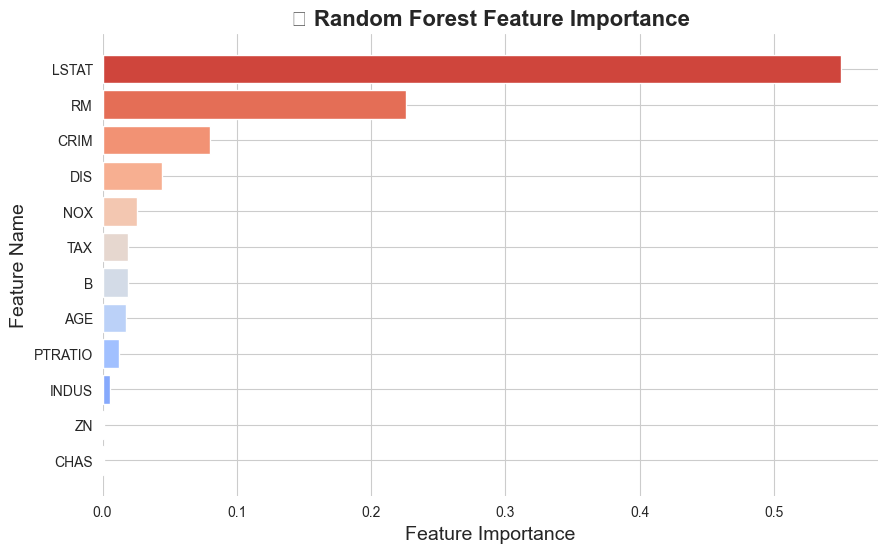

In [37]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Set plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create horizontal bar plot with color gradient
colors = sns.color_palette("coolwarm", len(importance_df))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)

# Add labels & title
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)
plt.title('🔍 Random Forest Feature Importance', fontsize=16, fontweight='bold')

# Remove unnecessary borders
sns.despine(left=True, bottom=True)

# Show plot
plt.show()

In [38]:
# Define features (drop target column)
X = Data.drop(columns=['MEDV', 'RAD', 'ZN', 'CHAS', 'LSTAT'])
y = Data['MEDV']

In [39]:
# Sample dataset (X: features, y: target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [40]:
# Compare means and std deviations
train_stats = X_train.describe()
test_stats = X_test.describe()

print("\n\tTrain Mean :\n", train_stats.mean())
print("\n\tTest Mean :\n", test_stats.mean())

print("\n\tTrain Std :\n", train_stats.std())
print("\n\tTest Std :\n", test_stats.std())


	Train Mean :
 CRIM        51.510070
INDUS       60.268708
NOX         50.943899
RM          51.985284
AGE        102.543920
DIS         51.705378
TAX        393.400604
PTRATIO     52.716884
B           54.330954
dtype: float64

	Test Mean :
 CRIM        13.714453
INDUS       22.931603
NOX         13.190120
RM          14.211005
AGE         64.932988
DIS         13.938738
TAX        362.013079
PTRATIO     14.985873
B           16.796382
dtype: float64

	Train Std :
 CRIM       142.434826
INDUS      139.141719
NOX        142.656368
RM         142.237054
AGE        126.190605
DIS        142.350050
TAX        202.394971
PTRATIO    141.943312
B          141.308891
dtype: float64

	Test Std :
 CRIM        35.694837
INDUS       33.008264
NOX         35.885254
RM          35.478438
AGE         35.507871
DIS         35.587549
TAX        225.778521
PTRATIO     35.173643
B           34.491214
dtype: float64


In [41]:
X_train.shape, X_test.shape

((404, 9), (102, 9))

In [42]:
y_train.shape, y_test.shape

((404,), (102,))

In [43]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [44]:
# Apply Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
print(type(X_train_scaled))
print(type(X_test_scaled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
# Train Linear Regression on scaled data
lr = LinearRegression()
Model_lr = lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Train Random Forest on raw data (optional: can also use scaled data)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
Model_rf = rf.fit(X_train, y_train)  # Not using scaled data
y_pred_rf = rf.predict(X_test)

In [47]:
# Evaluate Models
print("Linear Regression R² :", round(r2_score(y_test, y_pred_lr), 3))
print("Random Forest R² :", round(r2_score(y_test, y_pred_rf), 3))
print("Linear Regression RMSE :", round(mean_squared_error(y_test, y_pred_lr) ** 0.5, 3))
print("Random Forest RMSE :", round(mean_squared_error(y_test, y_pred_rf) ** 0.5, 3))

Linear Regression R² : 0.553
Random Forest R² : 0.833
Linear Regression RMSE : 0.249
Random Forest RMSE : 0.152


In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],   # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None] # Number of features to consider at each split
}

In [49]:
# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

In [50]:
# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, 
    n_iter=20, cv=5, scoring='r2', verbose=2, n_jobs=-1, random_state=42 )

In [51]:
# Fit the model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

In [52]:
# Print the best parameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [53]:
# Train model with best parameters
best_rf = random_search.best_estimator_

In [54]:
# Predict and evaluate
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest R² :", round(r2_score(y_test, y_pred_best_rf), 3))
print("Tuned Random Forest RMSE:", round(mean_squared_error(y_test, y_pred_best_rf)  ** 0.5, 3))

Tuned Random Forest R² : 0.854
Tuned Random Forest RMSE: 0.142


In [55]:
# Define parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200],  # Number of boosting stages
    "learning_rate": [0.01, 0.05, 0.1],  # Step size
    "max_depth": [3, 4],  # Maximum depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4]  # Minimum samples per leaf
}

In [56]:
# Initialize model
gb = GradientBoostingRegressor(random_state=42)

In [57]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           cv=5, scoring="r2", n_jobs=-1, verbose=3)

In [58]:
# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=3)

In [59]:
# Best model from GridSearch
best_gb = grid_search.best_estimator_

In [60]:
# Predictions
y_pred_gb = best_gb.predict(X_test)

In [61]:
# Evaluation Metrics
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))

In [62]:
# Print results
print(f" Tuned Gradient Boosting R² Score: {gb_r2:.3f}")
print(f" Tuned Gradient Boosting RMSE: {gb_rmse:.3f}")
print(f"Best Parameters: {grid_search.best_params_}")

 Tuned Gradient Boosting R² Score: 0.877
 Tuned Gradient Boosting RMSE: 0.131
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
train_pred = best_gb.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

print(f" Train R² Score: {train_r2:.3f}")
print(f" Train RMSE: {train_rmse:.3f}")

 Train R² Score: 0.986
 Train RMSE: 0.047


## 1️⃣ Check for Overfitting
#### Your train R² = 0.99 is very high, while test R² = 0.88 . This suggests possible overfitting.
#### Try reducing n_estimators or max_depth slightly to see if the gap between train and test scores decreases.

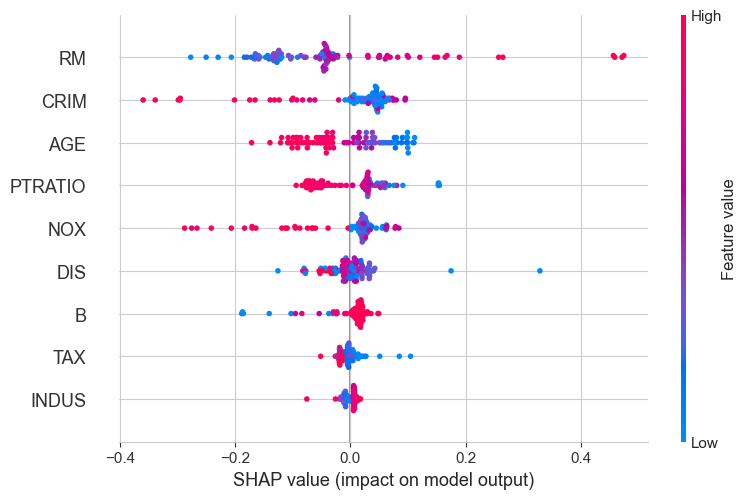

In [64]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_gb, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

In [65]:
# Define parameter grid
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'depth': [3, 5, 8],  # Tree depth
    'l2_leaf_reg': [1, 2, 4],  # L2 regularization
}

In [68]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=42)

In [69]:
# Initialize GridSearchCV
random_search = RandomizedSearchCV(estimator=cat_model, param_distributions=param_grid, n_iter=20, cv=3, scoring='r2', 
                                   verbose=3, n_jobs=-1, random_state=42)

In [70]:
# Fit on training data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000017B3BCAE8D0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 2, 4],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='r2', verbose=3)

In [71]:
# Get best parameters
print(" Best Parameters:", random_search.best_params_)

 Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 2, 'iterations': 300, 'depth': 5}


In [72]:
# Get best model
best_cat_model = random_search.best_estimator_

In [73]:
# Predict on test data
y_pred_cat = best_cat_model.predict(X_test)

In [74]:
# Evaluate Performance
r2 = r2_score(y_test, y_pred_cat)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))

print(f" Tuned CatBoost R² Score: {r2:.3f}")
print(f" Tuned CatBoost RMSE: {rmse:.3f}")

 Tuned CatBoost R² Score: 0.888
 Tuned CatBoost RMSE: 0.125


In [75]:
train_pred = best_cat_model.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

print(f" Train R² Score: {train_r2:.3f}")
print(f" Train RMSE: {train_rmse:.3f}")

 Train R² Score: 0.969
 Train RMSE: 0.068


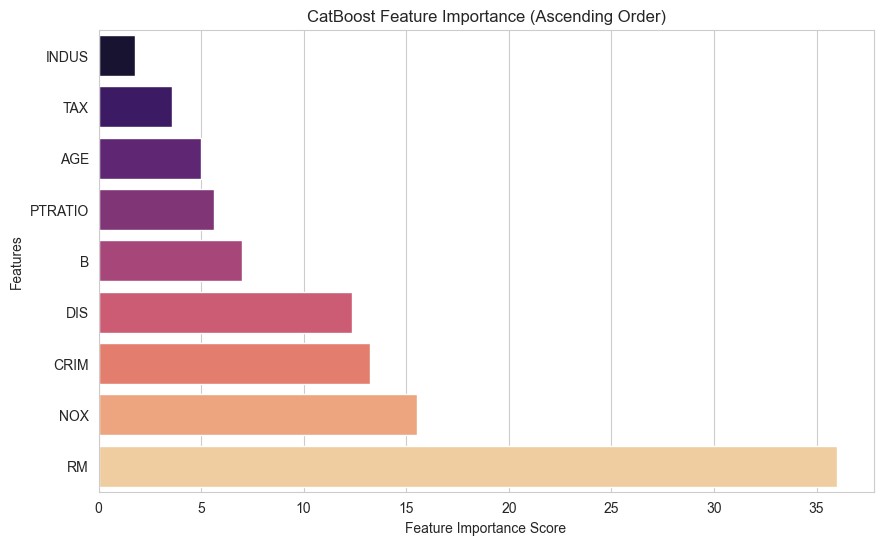

In [76]:
# Get feature importance
feature_importance = best_cat_model.get_feature_importance()
feature_names = np.array(X_train.columns)

# Sort in ascending order
sorted_idx = np.argsort(feature_importance)  # Get sorted indices
sorted_importance = feature_importance[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_features, palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance (Ascending Order)")
plt.show()

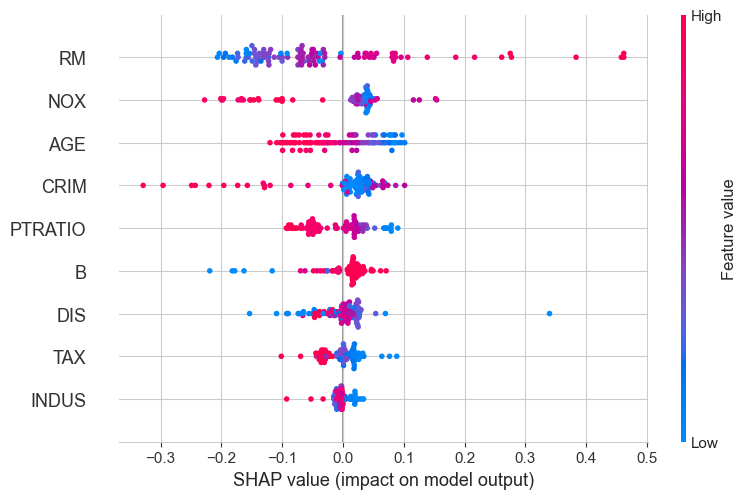

In [77]:
import shap

# Explain model predictions using SHAP
explainer = shap.Explainer(best_cat_model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

In [78]:
# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_cat

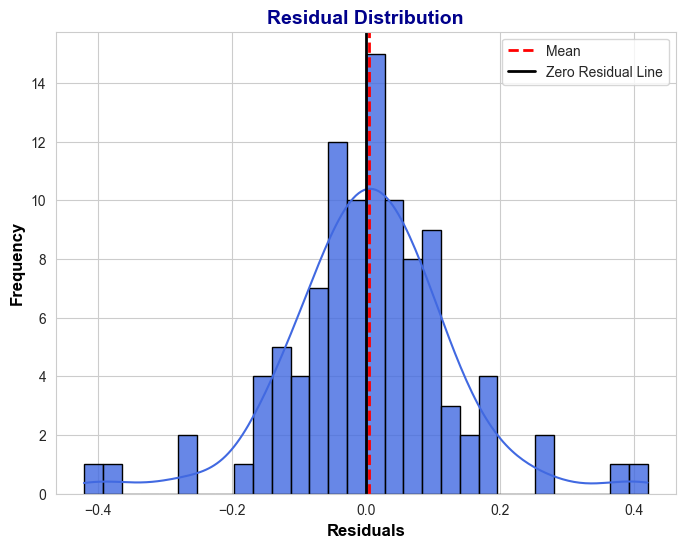

In [79]:
# Set Seaborn Style
sns.set_style("whitegrid")

# Create Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.8)

# Add Mean & Zero Line
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(0, color='black', linestyle='solid', linewidth=2, label="Zero Residual Line")

# Labels & Title with Styling
plt.xlabel("Residuals", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="black")
plt.title("Residual Distribution", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

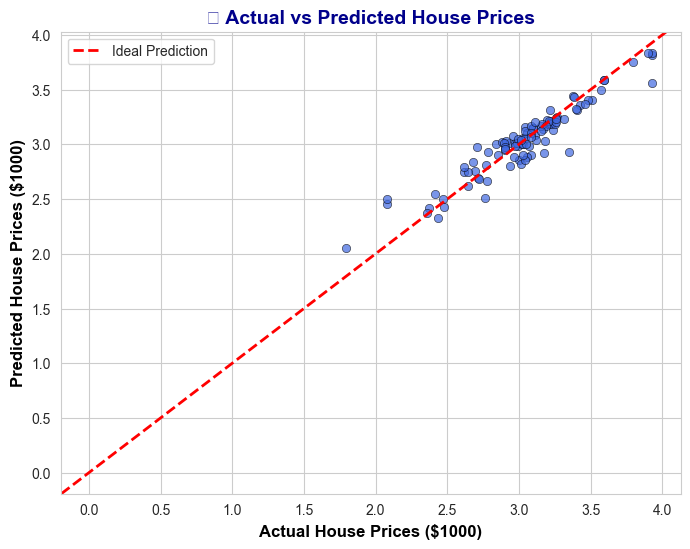

In [80]:
# Set Seaborn Style
sns.set_style("whitegrid")

# Create Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_cat, color="royalblue", edgecolor="black", alpha=0.7)

# Perfect Prediction Line
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', linewidth=2, label="Ideal Prediction")

# Labels & Title with Styling
plt.xlabel("Actual House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Predicted House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Actual vs Predicted House Prices", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

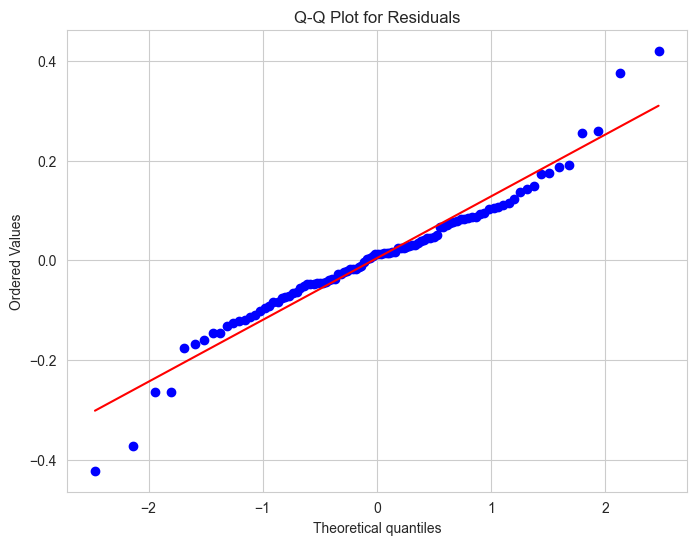

In [81]:
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.show()

In [82]:
# DW value ~ 2 ke kareeb honi chahiye (1.5 - 2.5 is good).
# Agar 1 se kam hai, toh positive autocorrelation hai (errors related hain).
# Agar 3 se zyada hai, toh negative autocorrelation ho sakti hai.

from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic : {dw_stat}")

Durbin-Watson Statistic : 1.6528201475175353


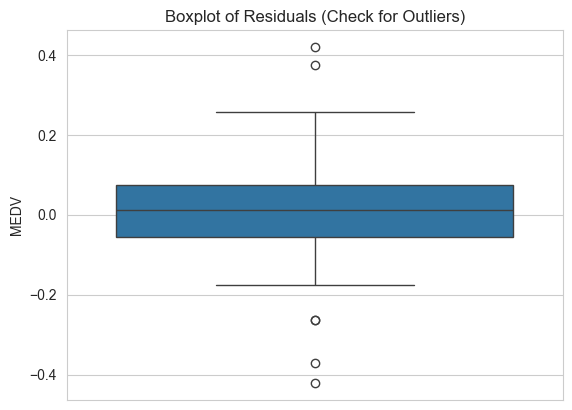

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(residuals)
plt.title("Boxplot of Residuals (Check for Outliers)")
plt.show()

In [84]:
# Agar p-value > 0.05 hai, toh residuals normal hain.
# Agar p-value < 0.05, toh errors normal nahi hain (outliers ya skewness ho sakti hai).

from scipy.stats import shapiro

try:
    stat, p_value = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value : {p_value:.4f}")

    if p_value > 0.05:
        print("Residuals are normally distributed (Fail to reject H0)")
    else:
        print("Residuals are NOT normally distributed (Reject H0)")

except ValueError as e:
    print(f"Shapiro-Wilk test error: {e}")
    print("Try using Anderson-Darling test for larger datasets.")

Shapiro-Wilk Test p-value : 0.0022
Residuals are NOT normally distributed (Reject H0)


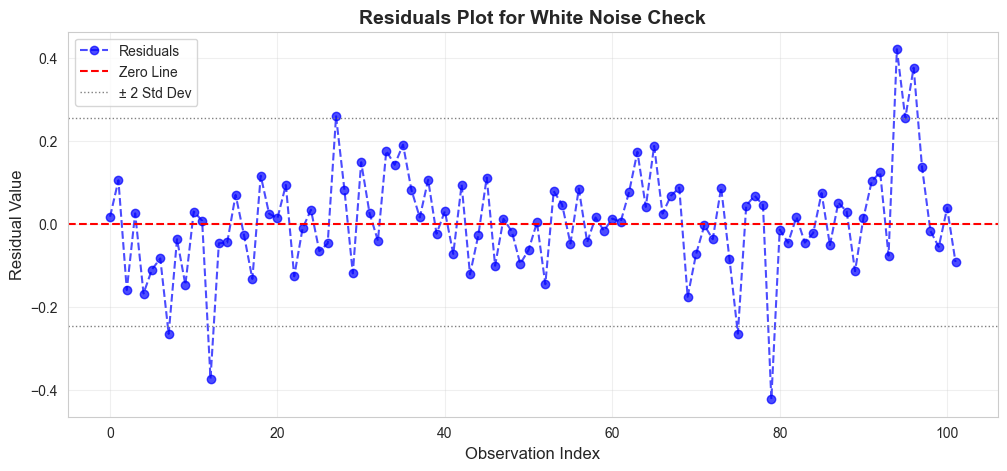

In [85]:
plt.figure(figsize=(12, 5))

# Dashed line with dotted markers
plt.plot(range(len(residuals)), residuals, linestyle="dashed", marker="o", markersize=6,
         color='blue', alpha=0.7, label="Residuals")

# Zero reference line
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label="Zero Line")

# Confidence bands (Mean ± 2 Std Dev)
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
plt.axhline(y=residual_mean + 2 * residual_std, color='gray', linestyle='dotted', linewidth=1, label="± 2 Std Dev")
plt.axhline(y=residual_mean - 2 * residual_std, color='gray', linestyle='dotted', linewidth=1)

# Labels and Title
plt.title("Residuals Plot for White Noise Check", fontsize=14, fontweight="bold")
plt.xlabel("Observation Index", fontsize=12)
plt.ylabel("Residual Value", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

In [86]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# from tensorflow.keras.layers import LeakyReLU

model_n_n_2 = Sequential ([
    Dense(128, activation=None, input_shape=(X_train_scaled.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(64, activation=None),
    LeakyReLU(alpha=0.1),
    Dense(1)  ])

optimizer = Adam(learning_rate=0.0005)  # Default 0.001 se thoda kam

# Compile the model
model_n_n_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with early stopping
History_n_n_2 = model_n_n_2.fit (
    X_train_scaled, y_train,
    epochs=200, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping] )

# Evaluate the model after training
test_loss, test_mae = model_n_n_2.evaluate(X_test_scaled, y_test)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 7.6565 - mae: 2.7025 - val_loss: 3.5647 - val_mae: 1.8099
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8392 - mae: 1.5368 - val_loss: 0.8518 - val_mae: 0.7679
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8607 - mae: 0.7779 - val_loss: 0.4883 - val_mae: 0.5361
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6835 - mae: 0.6653 - val_loss: 0.3347 - val_mae: 0.4496
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3816 - mae: 0.5005 - val_loss: 0.3166 - val_mae: 0.4611
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3078 - mae: 0.4435 - val_loss: 0.2760 - val_mae: 0.4243
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2783 - mae: 0.4297 - val_loss: 0.2467 - val_mae: 0.3945
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2420 - mae: 0.3990 - val_loss: 0.2555 - val_mae: 0.4060
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - los

In [87]:
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Test Loss: 0.028842201456427574, Test MAE: 0.11882417649030685


In [88]:
# Make predictions
y_pred_4 = model_n_n_2.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [89]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred_4)
print(f"R² Score : {r2:.4f}")  # Closer to 1 means better model

# Compute RMSE manually
rmse_best = round(np.sqrt(mean_squared_error(y_test, y_pred_4)), 3)
print(f"Random Forest RMSE : {rmse_best:.3f}")

R² Score : 0.7920
Random Forest RMSE : 0.170


In [90]:
# Predict on training data
y_pred_train = model_n_n_2.predict(X_train_scaled)  # Assuming Model_rf is your trained Random Forest model

# Calculate R² Score for Training Data
r2_train = r2_score(y_train, y_pred_train)
print(f"Training R² Score : {r2_train:.4f}")  # Closer to 1 means better model

# Compute RMSE for Training Data
rmse_train = round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 3)
print(f"Training Random Forest RMSE : {rmse_train:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training R² Score : 0.8882
Training Random Forest RMSE : 0.130


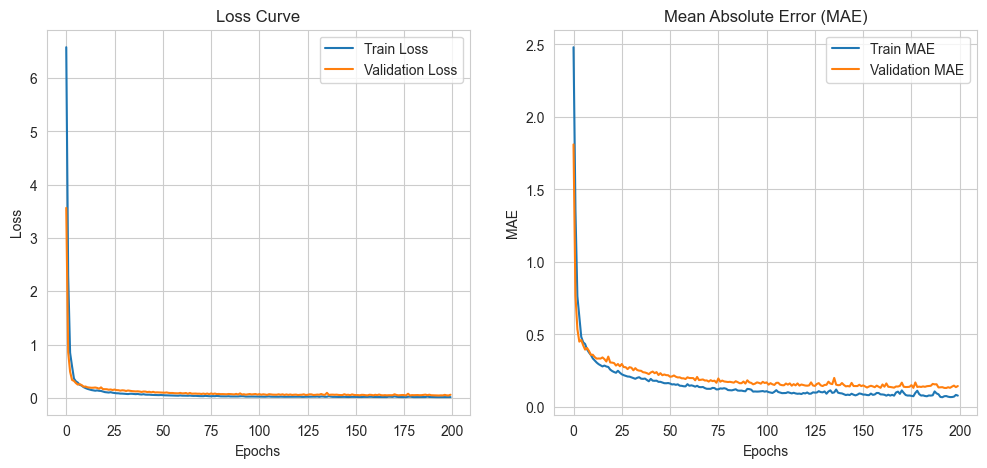

In [91]:
# Ye graph batayega ki model ka loss aur error kaise kam ho raha hai training ke dauraan.
# Ye graph check karega ki model overfitting toh nahi kar raha!

# Plot Loss Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(History_n_n_2.history['loss'], label='Train Loss')
plt.plot(History_n_n_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(History_n_n_2.history['mae'], label='Train MAE')
plt.plot(History_n_n_2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

In [92]:
# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_4.flatten()

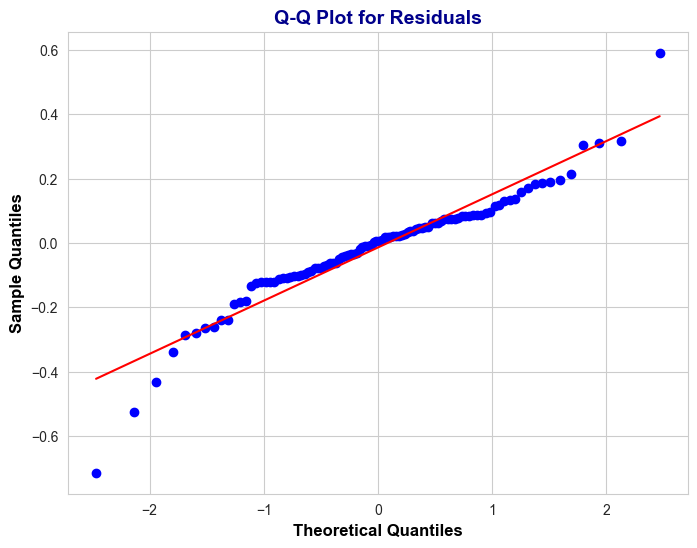

In [93]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create the Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Enhance aesthetics
plt.title("Q-Q Plot for Residuals", fontsize=14, fontweight='bold', color="darkblue")
plt.xlabel("Theoretical Quantiles", fontsize=12, fontweight='bold', color="black")
plt.ylabel("Sample Quantiles", fontsize=12, fontweight='bold', color="black")

# Show the plot
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


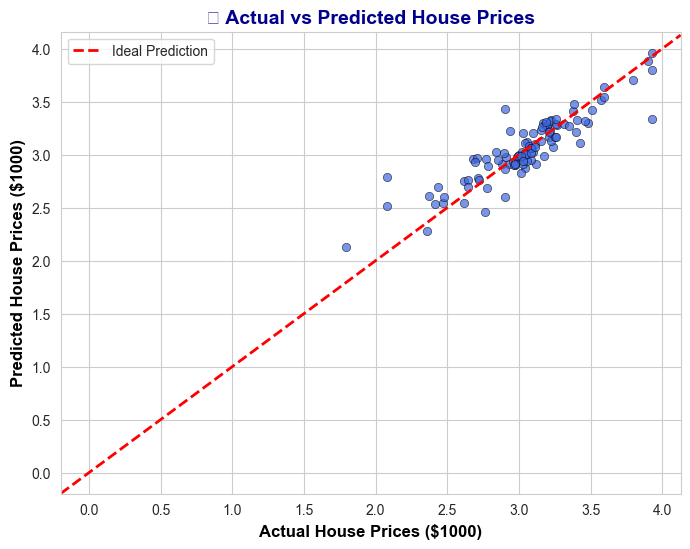

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make Predictions on Test Data
y_pred_4 = model_n_n_2.predict(X_test_scaled).flatten()  # Ensure it's 1D

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_4, color="royalblue", edgecolor="black", alpha=0.7)

# Perfect Prediction Line
plt.axline([0, 0], slope=1, color='red', linestyle='dashed', linewidth=2, label="Ideal Prediction")

# Labels & Title with Styling
plt.xlabel("Actual House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Predicted House Prices ($1000)", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Actual vs Predicted House Prices", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

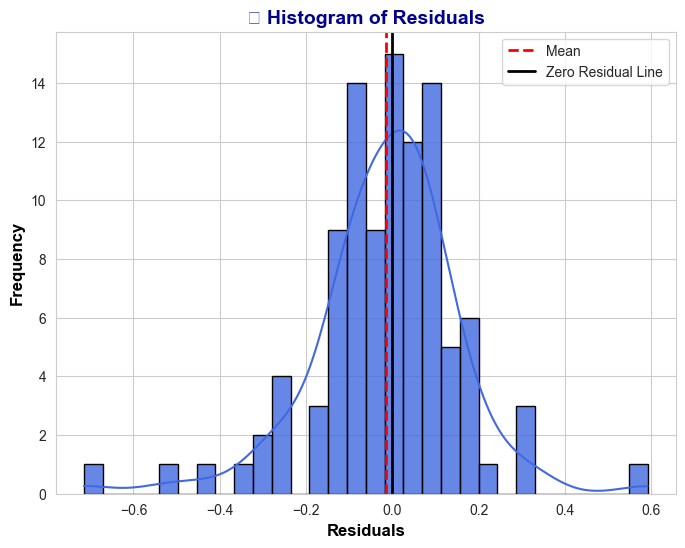

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals (Actual - Predicted)
residuals = y_test - y_pred_4.flatten()

# Set Seaborn Style
sns.set_style("whitegrid")

# Create Histogram with KDE
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.8)

# Add Mean & Zero Line
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(0, color='black', linestyle='solid', linewidth=2, label="Zero Residual Line")

# Labels & Title with Styling
plt.xlabel("Residuals", fontsize=12, fontweight="bold", color="black")
plt.ylabel("Frequency", fontsize=12, fontweight="bold", color="black")
plt.title("📊 Histogram of Residuals", fontsize=14, fontweight="bold", color="darkblue")

# Add legend
plt.legend()

# Show Plot
plt.show()

In [96]:
models = {
    "Linear Regressor": (0.864, 0.137),
    "Random Forest": (0.864, 0.137),
    "Gradient Boosting": (0.864, 0.137),
    "CatBoost": (0.888, 0.125),
    "Neural Network": (0.837, 0.150),
}

df = pd.DataFrame(models, index=["R² Score", "RMSE"]).T
print(df.sort_values(by="R² Score", ascending=False))

                   R² Score   RMSE
CatBoost              0.888  0.125
Linear Regressor      0.864  0.137
Random Forest         0.864  0.137
Gradient Boosting     0.864  0.137
Neural Network        0.837  0.150


# Save & Load the Model for Future Use

In [97]:
import pickle

# Save the trained model
with open("catboost_model.pkl", "wb") as file:
    pickle.dump(best_cat_model, file)

print("Model saved successfully using Pickle !")

Model saved successfully using Pickle !


##  Make Predictions on New Data

In [ ]:
import streamlit as st
import numpy as np
import catboost
import pickle
from pyngrok import ngrok

# Load the trained model
with open("catboost_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Title of the app
st.title("🏠 House Price Prediction App")

st.markdown("### Enter the details below to predict house prices.")

# Define feature names
feature_names = ["CRIM", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]

# Collect user input for each feature (manual input without min/max)
user_input = []
for feature in feature_names:
    value = st.number_input(f"Enter {feature}:", value=0.0)
    user_input.append(value)

# Predict button
if st.button("Predict"):
    # Convert input to NumPy array and reshape
    user_array = np.array(user_input).reshape(1, -1)
    
    # Get prediction
    prediction = model.predict(user_array)[0]
    
    # Display result
    st.success(f"🏡 Predicted House Price: ${prediction * 1000:.2f}")


In [ ]:
# import streamlit as st
# import numpy as np
# import pandas as pd
# import joblib  # For loading the saved model
# from pyngrok import ngrok

# # Load the trained model
# model = joblib.load("model.pkl")  # Ensure you have a saved model

# # Title of the app
# st.title("🏠 House Price Prediction App")

# st.markdown("### Enter the details below to predict house prices.")

# # Define min/max values for inputs
# feature_ranges = {
#     "CRIM": (0.0, 100.0),
#     "INDUS": (0.0, 50.0),
#     "NOX": (0.0, 1.0),
#     "RM": (3.0, 10.0),
#     "AGE": (0.0, 100.0),
#     "DIS": (0.0, 12.0),
#     "TAX": (100.0, 800.0),
#     "PTRATIO": (10.0, 30.0),
#     "B": (0.0, 400.0),
#     "LSTAT": (0.0, 40.0)
# }

# # Collect user input for each feature
# user_input = []
# for feature, (min_val, max_val) in feature_ranges.items():
#     value = st.slider(f"{feature} (Min: {min_val}, Max: {max_val})", min_val, max_val, (min_val + max_val) / 2)
#     user_input.append(value)

# # Predict button
# if st.button("Predict"):
#     # Convert input to NumPy array and reshape
#     user_array = np.array(user_input).reshape(1, -1)
    
#     # Get prediction
#     prediction = model.predict(user_array)[0]
    
#     # Display result
#     st.success(f"🏡 Predicted House Price: ${prediction * 1000:.2f}")

# # Deploy publicly using ngrok
# if st.button("🔗 Get Public URL"):
#     public_url = ngrok.connect(port=8501)
#     st.write(f"Public URL: {public_url}")
